<a href="https://colab.research.google.com/github/Shoumik29/Artificial-intelligence-Lab/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, Model

#Data Generator Function
- Generating data from range -20 to 20

In [2]:
def generate_data(num_of_data):
    X = np.random.randint(-20, 20, size=num_of_data, dtype=int)
    Y = 5*X**3 - 68*X**2 - 7*X + 1
    return X, Y

#Defining the DNN Model

In [3]:
def DNN_Model():
	inputs = layers.Input(shape=(1))
	x = layers.Dense(32, activation='relu')(inputs)
	x = layers.Dense(64, activation='relu')(x)
	x = layers.Dense(128, activation='relu')(x)
	outputs = layers.Dense(1)(x)

	model = Model(inputs=inputs, outputs=outputs)

	return model

#Normalizing Data from -1 to +1

In [4]:
data_x, data_y = generate_data(5000)
x_min = np.min(data_x)
x_max = np.max(data_x)
y_min = np.min(data_y)
y_max = np.max(data_y)

data_x = 2 * ((data_x - x_min) / (x_max - x_min)) - 1
data_y = 2 * ((data_y - y_min) / (y_max - y_min)) - 1

train_x = data_x[:int(len(data_x)*.9)]
train_y = data_y[:int(len(data_y)*.9)]

val_x = data_x[int(len(data_x)*.9):int(len(data_x)*.95)]
val_y = data_y[int(len(data_y)*.9):int(len(data_y)*.95)]

test_x = data_x[int(len(data_x)*.95):]
test_y = data_y[int(len(data_y)*.95):]

#Compiling and Training the Model

In [5]:
model = DNN_Model()
model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-4), loss="mean_squared_error", metrics=[tf.keras.metrics.R2Score()])
history = model.fit(train_x, train_y, epochs=10, validation_data=(val_x, val_y))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense (Dense)               (None, 32)                64        
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 10625 (41.50 KB)
Trainable params: 10625 (41.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
141/141 [==============================] - 1s 3ms/step - loss: 0.0561 - r2_score: 0.7383 - val_loss: 0.0017 - val_r2_score: 0.9911
Epoch 2/10
141/141 [==============================] - 0s 1ms/step - loss: 9.9451e-04 - r2_score: 0.9954 - val_loss: 4.3185e-04 - val_r2_score: 0.9977
Epoch 3/10
141/141 [==============================] - 0s 1ms/step - loss: 3.8526e-04 - r2_score: 0.9982 - val_loss: 2.7390e-04 - val_r2_score: 0.9985
Epoch 4/10
141/141 [==============================] - 0s 1ms/step - loss: 2.2541e-04 - r2_score: 0.9989 - val_loss: 1.5526e-04 - val_r2_score: 0.9992
Epoch 5/10
141/141 [==============================] - 0s 2ms/step - loss: 1.5412e-04 - r2_score: 0.9993 - val_loss: 1.4598e-04 - val_r2_score: 0.9992
Epoch 6/10
141/141 [==============================] - 0s 2ms/step - loss: 1.1095e-04 - r2_score: 0.9995 - val_loss: 1.1784e-04 - val_r2_score: 0.9994
Epoch 7/10
141/141 [==============================] - 0s 2ms/step - loss: 8.9320e-05 - r2_score: 0.9996 - va

#Getting the Predicted Results on Test Data

In [6]:
pred_y = model.predict(test_x)

8/8 [==============================] - 0s 2ms/step


#Denormalizing the Test Data and Predicted Output

In [7]:
test_x = ((test_x + 1) * (x_max - x_min) / 2) + x_min
test_y = ((test_y + 1) * (y_max - y_min) / 2) + y_min
pred_y = ((pred_y + 1) * (y_max - y_min) / 2) + y_min

#Used the Test Data for prediction

In [8]:
print('Actual X Value: ', test_x[0])
print('Actual Y Value: ', test_y[0])
print('Predicted Y Value: ', pred_y[0])

Actual X Value:  8.0
Actual Y Value:  -1847.0000000000073
Predicted Y Value:  [-1815.5399884]


#Plotting the training accuracy vs validation accuracy and training error vs validation error curves and also plotting the prediction accuracy vs true levels of the Test Data.

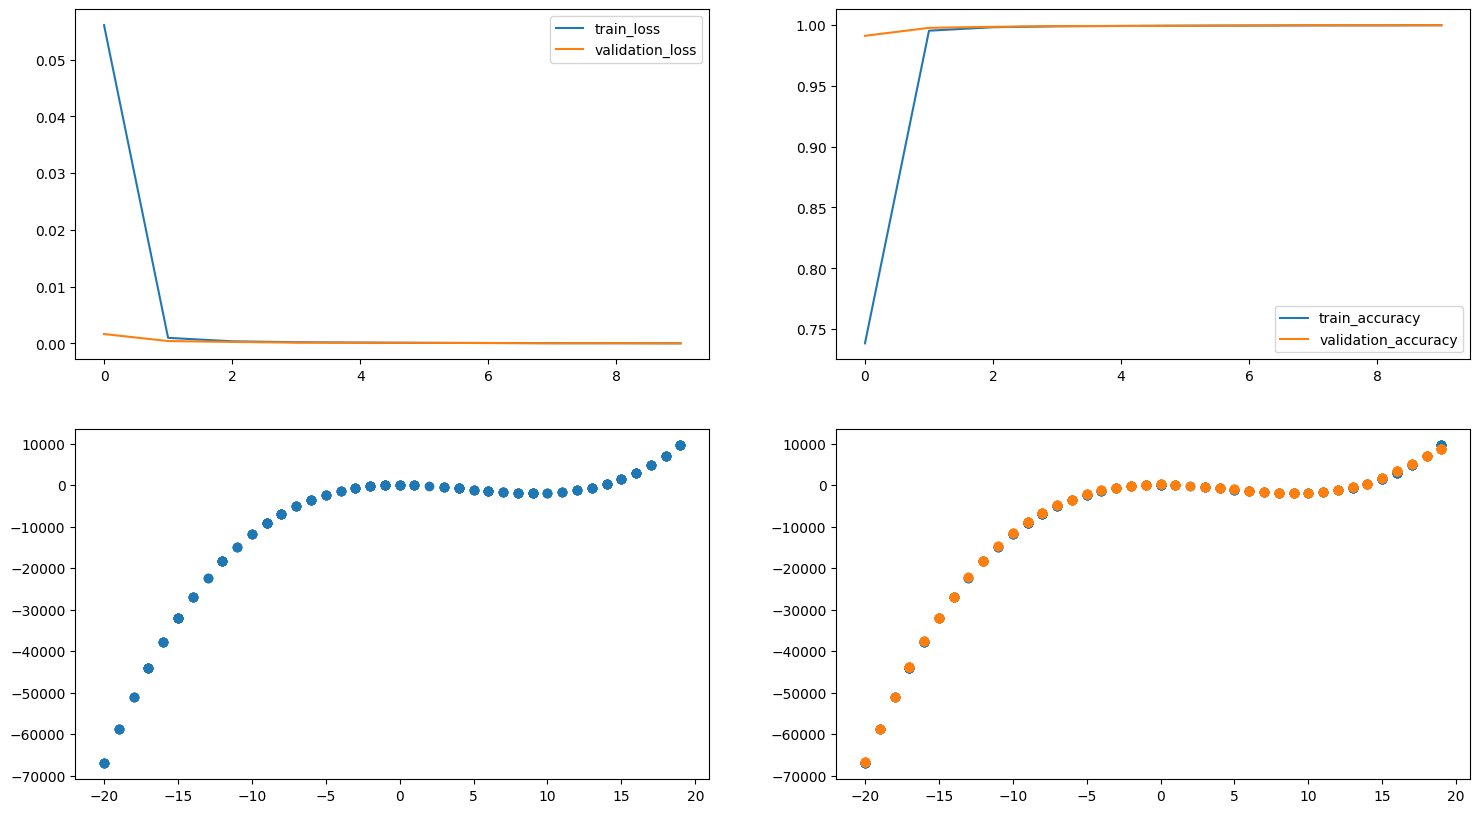

In [9]:
performance_dict = history.history
plt.figure(figsize = (18, 10))
plt.subplot(2,2,1)
plt.plot(performance_dict['loss'])
plt.plot(performance_dict['val_loss'])
plt.legend(['train_loss', 'validation_loss'])

plt.subplot(2,2,2)
plt.plot(performance_dict['r2_score'])
plt.plot(performance_dict['val_r2_score'])
plt.legend(['train_accuracy', 'validation_accuracy'])

plt.subplot(2,2,3)
plt.scatter(test_x, test_y)

plt.subplot(2,2,4)
plt.scatter(test_x, test_y)
plt.scatter(test_x, pred_y)

plt.show()